In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
filepath = 'ip4.log'
filecsv = "ip4.csv"

header = ['time','offset', 'delay', 'host']

# Structure of ptp4l log "ptp4l[3875.719]: rms 138325 max 252264 freq -105386 +/- 52020 delay  7459 +/- 488"

files=['ip4.log','ip3.log']
df=pd.DataFrame()
for file in files: 
    print("Using File:" + file)
    with open(file) as fp:
        d = []
        name =file.split('.')[0]
        line = fp.readline()
        cnt = 1
        while line:
                data = []
                sSp=line.split()
                time=float(sSp[0].replace('ptp4l','').replace('[', '').replace("]:", ''))
                data.append(time)
                for i in range(0, len(sSp)):
                    if sSp[i] =='rms':
                        data.append(int(sSp[i+1]))
                    if sSp[i] =='delay':
                        data.append(int(sSp[i+1]))                      
                if len(data) == 3:
                     data.append(name)
                     d.append(data)
                line = fp.readline()
                cnt += 1
        df=pd.concat([df, pd.DataFrame(d, columns=header)])

df.head()                

Using File:ip4.log
Using File:ip3.log


time  offset  delay host
0  3882.674   72410  12010  ip4
1  3883.674    4983  12010  ip4
2  3884.673    8332  12009  ip4
3  3885.673    5314  12008  ip4
4  3886.672    1734  11952  ip4

[Text(0, 0.5, 'Delay [ns]'), Text(0.5, 0, 'Time')]

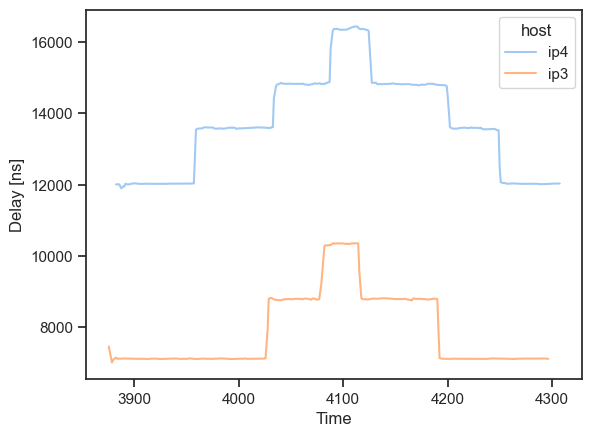

In [3]:
palette = sns.color_palette("rocket_r")
ax=sns.lineplot(x='time', y='delay', data=df, 
                  hue="host",  size_order=["T1", "T2"]
                 )
ax.set(ylabel='Delay [ns]', xlabel='Time')

[Text(0, 0.5, 'Offset [ns]'), Text(0.5, 0, 'Time')]

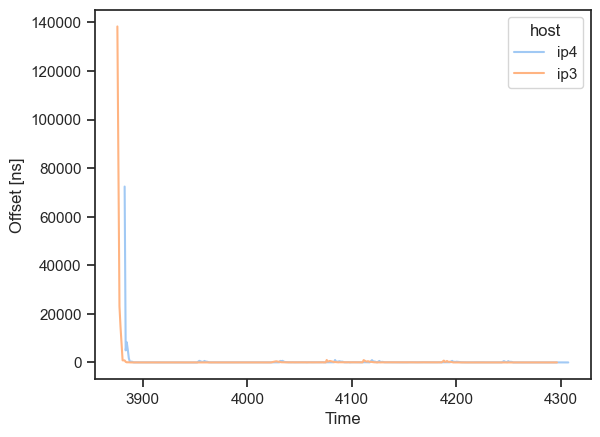

In [4]:
ax=sns.lineplot(x='time', y='offset', data=df, 
                  hue="host",  size_order=["T1", "T2"]
                 )
ax.set(ylabel='Offset [ns]', xlabel='Time')

C:\Users\xelon\AppData\Local\Temp\ipykernel_18640\3401389065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpruned['index'] =dfpruned.index


[Text(0, 0.5, 'Offset [ns]'), Text(0.5, 0, 'Time')]

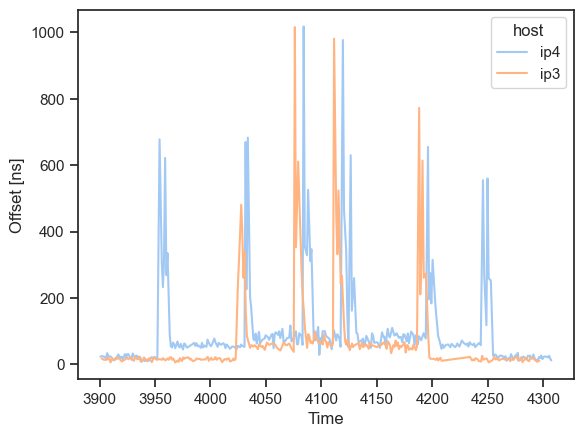

In [5]:
dfpruned=df[df['time'] > 3900 ]
dfpruned['index'] =dfpruned.index
ax=sns.lineplot(x='time', y='offset', data=dfpruned, 
                  hue="host",  size_order=["T1", "T2"]
                 )
ax.set(ylabel='Offset [ns]', xlabel='Time')

[Text(0, 0.5, 'Delay [ns]'), Text(0.5, 0, 'Time')]

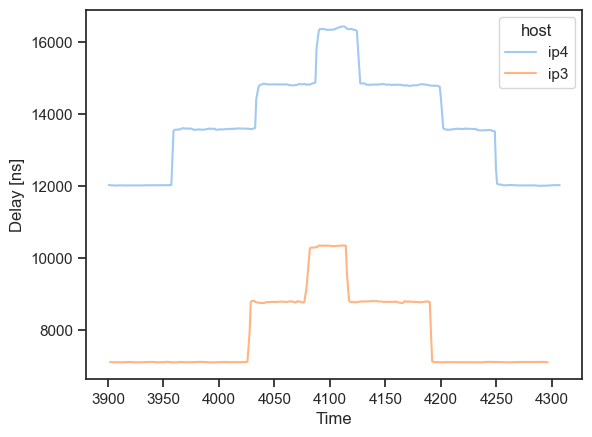

In [6]:
palette = sns.color_palette("rocket_r")
ax=sns.lineplot(x='time', y='delay', data=dfpruned, 
                  hue="host",  size_order=["T1", "T2"]
                 )
ax.set(ylabel='Delay [ns]', xlabel='Time')